# PyTorch Intro
PyTorch Official Tutorial: https://pytorch.org/tutorials/

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms

import matplotlib.pyplot as plt
import numpy as np

import pdb

In [2]:
import loader # a module (.py file) we created. Read for more information

basic_transformer = transforms.Compose([transforms.ToTensor()])

batch_size = 32

trainloader, validloader = loader.get_data_loader(basic_transformer, basic_transformer, batch_size)


torch.Size([32, 3, 30, 30])
torch.Size([32])
tensor([3, 4, 2, 4, 3, 1, 3, 3, 4, 0, 0, 3, 0, 0, 0, 3, 0, 1, 3, 3, 3, 3, 2, 1,
        1, 0, 2, 4, 0, 2, 2, 4])


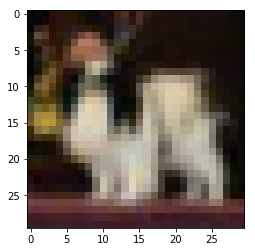

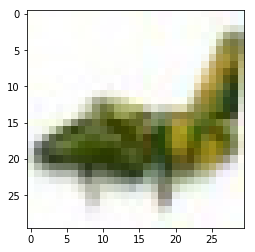

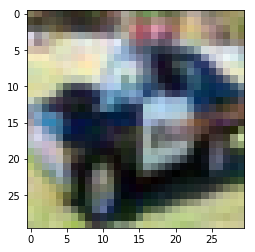

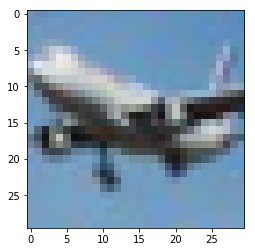

In [3]:
# [32, 3, 30, 30] = [batch size, channels, height, width]
for x, y in trainloader:
    print(x.shape)
    print(y.shape)
    print(y)
    break

# vis
for i in range(4):
    plt.imshow(np.transpose(x[i,:], (1,2,0))) # 30 x 30 x 3
    plt.show()


In [4]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        # define the layers
        # kernel size = 3 means (3,3) kernel
        # rgb -> 3 -> in channel
        # number of feature maps = 16
        # number of filters = 3 x 16
        self.l1 = nn.Conv2d(kernel_size=3, in_channels=3, out_channels=16)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2) 
        # MaxPool2d, AvgPool2d. 
        # The first 2 = 2x2 kernel size, 
        # The second 2 means the stride=2
        
        self.l2 = nn.Conv2d(kernel_size=3, in_channels=16, out_channels=32)
        
        # FC layer
        self.fc1 = nn.Linear(32 * 6 * 6, 5)
        
    def forward(self, x):
        # define the data flow through the deep learning layers
        x = self.pool(F.relu(self.l1(x))) # bs x 16 x 14 x 14
        x = self.pool(F.relu(self.l2(x))) # bs x 32 x 6 x 6
        # print(x.shape)
        x = x.reshape(-1, 32*6*6) # [bs x 1152]# CRUCIAL: 
        # print(x.shape)
        x = self.fc1(x)
        return x

In [5]:
m = CNN()
pred = m(x)
print(pred.shape)

torch.Size([32, 5])


In [6]:
print(pred)


tensor([[ 0.1389, -0.1451, -0.0188,  0.1282,  0.0480],
        [ 0.0837, -0.1823, -0.0440,  0.1306,  0.0502],
        [ 0.0972, -0.1101, -0.0358,  0.0636, -0.0235],
        [ 0.0963, -0.1282, -0.0590,  0.0743,  0.0378],
        [ 0.0903, -0.1250,  0.0056,  0.0623,  0.0411],
        [ 0.1539, -0.1484, -0.0230,  0.1110,  0.0798],
        [ 0.1376, -0.1103, -0.0608,  0.1110,  0.0820],
        [ 0.1142, -0.1438, -0.0356,  0.1158,  0.0724],
        [ 0.1224, -0.1528, -0.0405,  0.0931,  0.0686],
        [ 0.1317, -0.1428, -0.0551,  0.1094,  0.0748],
        [ 0.0518, -0.0676, -0.0102,  0.0811, -0.0141],
        [ 0.1016, -0.1283, -0.0497,  0.1051,  0.0614],
        [ 0.0732, -0.1549, -0.0186,  0.1048,  0.0533],
        [ 0.1063, -0.0692, -0.0035,  0.0940, -0.0044],
        [ 0.1001, -0.1026, -0.0428,  0.1036,  0.0403],
        [ 0.1442, -0.1446, -0.0355,  0.1190,  0.0485],
        [ 0.0880, -0.1035, -0.0244,  0.0735,  0.0138],
        [ 0.1369, -0.0970, -0.0386,  0.1251,  0.0291],
        [ 

# Training

In [7]:
criterion = nn.CrossEntropyLoss()
num_epoches = 10
import tqdm

import torch.optim as optim


USE_CUDA = torch.cuda.is_available()

if USE_CUDA:
    m = m.cuda()

In [8]:
for epoch_id in range(num_epoches):
    optimizer = optim.SGD(m.parameters(), lr=0.01 * 0.95 ** epoch_id)
    for x, y in tqdm.tqdm(trainloader):
        if USE_CUDA:
            x, y = x.cuda(), y.cuda()
        optimizer.zero_grad() # clear (reset) the gradient for the optimizer
        pred = m(x)
        loss = criterion(pred, y)
        loss.backward() # calculating the gradient
        optimizer.step() # backpropagation: optimize the model

100%|████████████████████████████████████████████████████████████████████████████████| 391/391 [00:07<00:00, 55.18it/s]


# Testing

In [9]:
all_gt = []
all_pred = []

for x, y in tqdm.tqdm(validloader):
    if USE_CUDA:
        x, y = x.cuda(), y.cuda()
    all_gt += list(y.detach().cpu().numpy().reshape(-1))
    pred = torch.argmax(m(x), dim=1)
    all_pred += list(pred.detach().cpu().numpy().reshape(-1))
    
    

100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 66.07it/s]


In [10]:
print(all_gt)
print(all_pred)

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

In [11]:
acc = np.sum(np.array(all_gt) == np.array(all_pred)) / len(all_gt)
print("Accuracy is:", acc)

Accuracy is: 0.796
